# <center>Оптимизация гиперпараметров модели
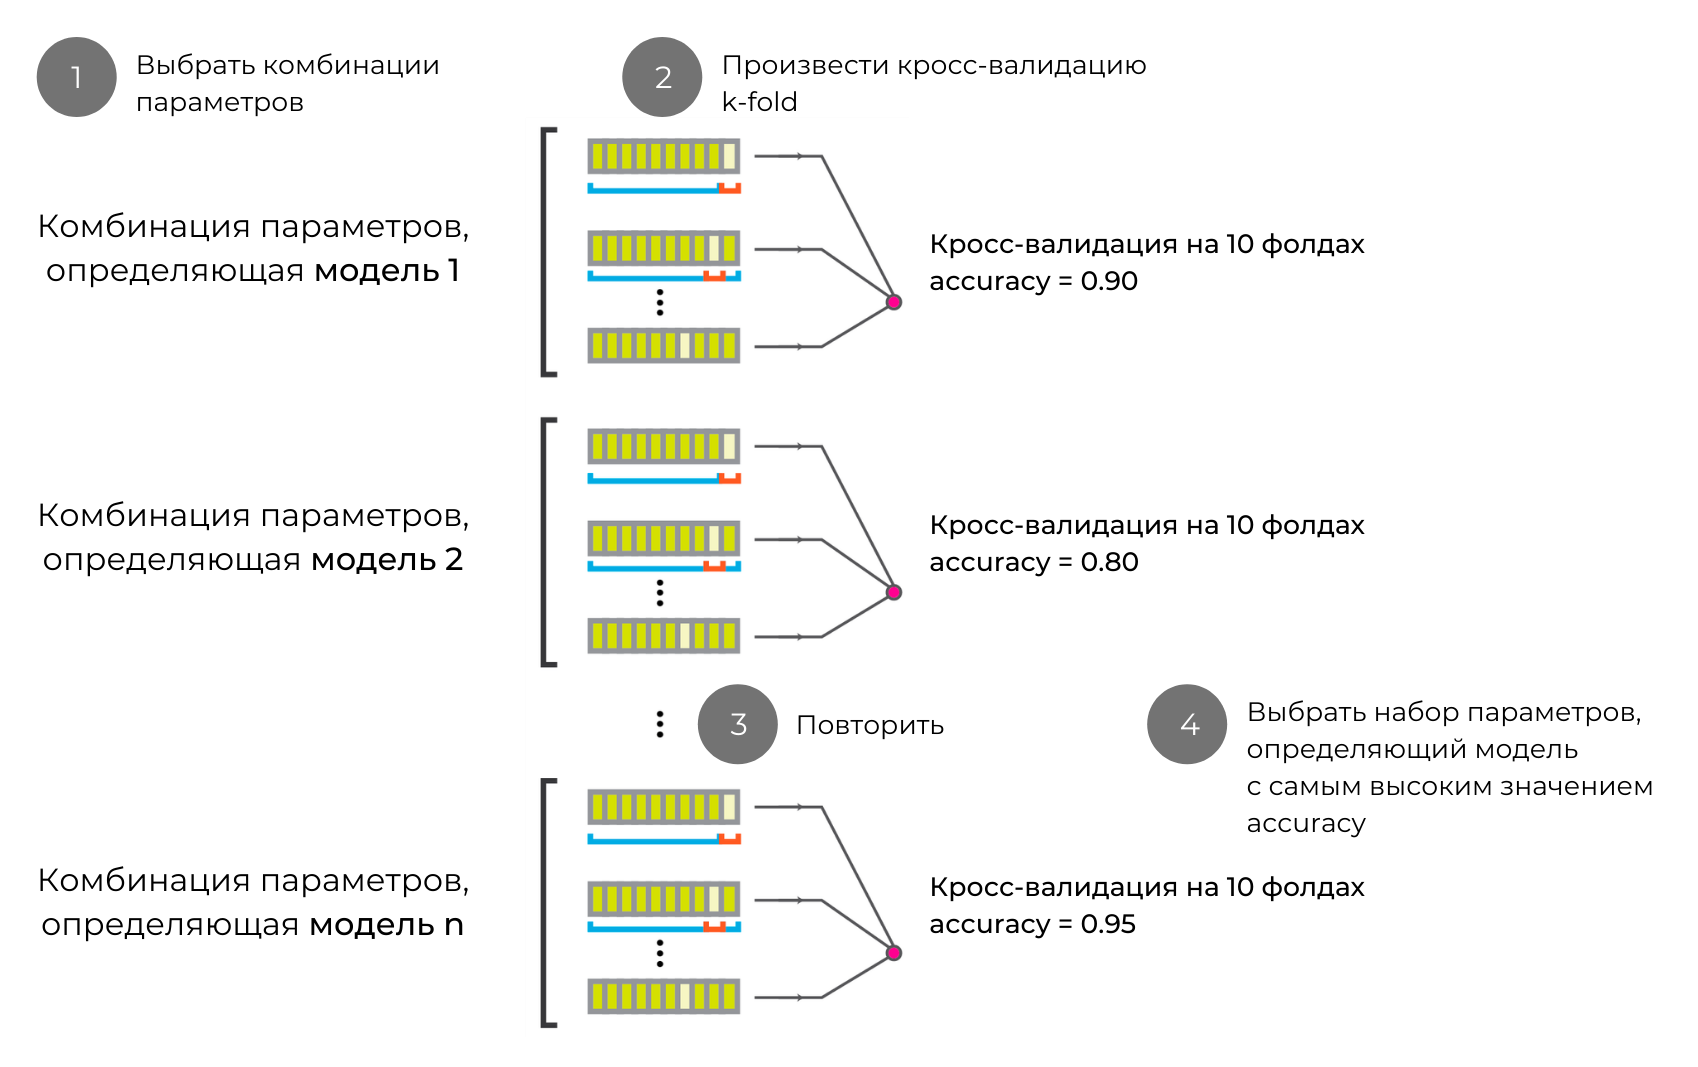
## GridSearchCV
`sklearn.model_selection.GridSearchCV`
* `estimator` — алгоритм(модель), который будем оптимизировать;
* `param_grid` — словарь или список словарей. Словарь с именами гиперпараметров (в формате строки (`str`), например, `'max_depth'`) в качестве ключей и списками параметров (например, `[5, 8, 10]`) в качестве значений. Итого: `{'max_depth': [5, 8, 10] }`. Также можно передать список таких словарей:
    ```python
    param_grid = [
        {'max_depth': [5, 8, 10],
        'min_samples_leaf': [7, 8, 9] }, #первый словарь 

        {'n_estimators': [100, 200, 300], 
        'max_depth': [5, 8, 10] } #второй словарь 
    ]
    ```
    В таком случае каждый словарь в списке перебирается отдельно и последовательно. Например, если количество итераций (параметр `n_iter`) равно `2`, то сначала будет дважды выбрана случайная комбинация параметров модели из словаря `{'max_depth': [5, 8, 10], 'min_samples_leaf': [7, 8, 9]}`, а после этого опять же дважды случайная комбинация из словаря `{'n_estimators': [100, 200, 300], 'max_depth': [5, 8, 10]}`.
* `scoring` — по умолчанию используется *score*-функция заданного алгоритма:
    * для классификации — `sklearn.metrics.accuracy_score`;
    * для регрессии — `sklearn.metrics.r2_score`;
* `cv` — количество фолдов в кросс-валидации, по умолчанию используется `5`.
* `n_jobs` — количество ядер для распараллеливания расчёта. `-1` использует все существующие ядра.

Когда мы вызываем `grid_search.fit(X_train_scaled, y_train)`, он запускает кросс-валидацию для каждой комбинации гиперпараметров, указанных в `param_grid`.

Наилучшая найденная комбинация гиперпараметров сохраняется в атрибуте `grid_search.best_params_`.

Наилучшая метрика - `grid_search.score(X_test_scaled, y_test)`

Либо можем посмотреть любую другую метрику, воспользовавшись методом `predict()` и передав предсказанные значения в функцию для расчёта метрики (например, `f1_score()`):
```python
y_test_pred = grid_search.predict(X_test_scaled)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
```
Итоговая модель хранится в параметре `grid_search.best_estimator_`, ей можно воспользоваться для получения прогнозов на новых данных.

Наилучшее значение метрики на **кросс-валидации** - `grid_search.best_score_`.

Результаты кросс-валидации хранятся в параметре `cv_results_`.

## RandomizedSearchCV
`sklearn.model_selection.RandomSearchCV`
* `param_distributions` - словарь или список словарей.
* `n_iter` - количество комбинаций на расчёт. От этого параметра напрямую зависит время оптимизации и качество модели.

Все остальные параметры аналогичны `GridSearchCV` 

# <center> Настройка гиперпараметров
## RandomForest
* `n_estimators` — число итераций (количество деревьев). Частично работает правило «чем больше, тем лучше», но иногда это не имеет особого смысла и сильно увеличивает затраты, поэтому стоит пробовать обучать сотни деревьев `[100, 200, 300, 400]`. Если нет изменений, то оставить минимальное — `100`.
* `max_depth` — максимальная глубина дерева. В случайном лесе строятся «сильные» деревья, каждое из которых даёт полноценный прогноз, поэтому глубина деревьев может быть достаточно большой. Стоит следить за переобучением.
* `max_features` — максимальное количество признаков, учитываемых алгоритмом при поиске лучшего разделения;
* `subsample` — доля выборки, которая будет использоваться для обучения каждого алгоритма — дерева.
## GradientBoosting
* `n_estimators` — число итераций (количество деревьев) : хотя ошибка на обучении монотонно стремится к нулю, ошибка на контроле, как правило, начинает увеличиваться после определенной итерации. Оптимальное число итераций можно выбирать, например, по отложенной выборке или с помощью кросс-валидации.
* `learning_rate` — темп обучения $(0;1]$:
    На практике оказывается, что градиентный бустинг очень быстро строит композицию, ошибка которой на обучении выходит на асимптоту (достигает предела), после чего начинает настраиваться на шум и переобучаться. Параметр `learning_rate` контролирует, насколько сильно каждое дерево будет пытаться исправить ошибки предыдущих деревьев. Более высокая скорость обучения означает, что каждое дерево может внести более сильные корректировки. Как правило, **чем меньше темп обучения, тем лучше качество итоговой композиции**.
* `max_depth` — максимальная глубина дерева. Используется для борьбы с переобучением. Рекомендуется устанавливать не более `5`.
* `max_features` — максимальное количество признаков, учитываемых алгоритмом при поиске лучшего разделения.
* `subsample` — доля выборки, которая будет использоваться для обучения каждого алгоритма. Это ещё один способ улучшения качества градиентного бустинга. Таким образом вносится рандомизация в процесс обучения базовых алгоритмов, что снижает уровень шума в обучении, а также повышает эффективность вычислений. Берите подвыборки, размер которых **вдвое меньше** исходной выборки.

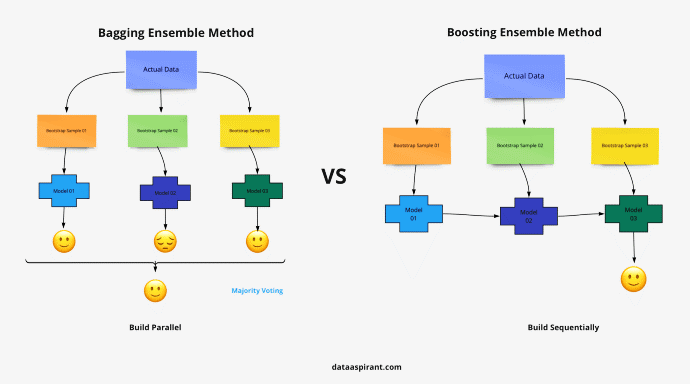